In [2]:
import pandas as pd

data_covid = pd.read_csv("D:/KLTN/dataset_covid.csv", delimiter=",", encoding="latin-1")
data_covid

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_2400\2011513233.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data_covid = pd.read_csv("D:/KLTN/dataset_covid.csv", delimiter=",", encoding="latin-1")


,Patient,ravien_icdbenhchinh,ravien_icdbenhkem,sex,age,mach,nhietdo,nhiptho,chieucao,cannang,...,caccoquan_tuanhoan_binhthuong,caccoquan_tuanhoan_longnguccandoi,caccoquan_tuanhoan_timdeu,caccoquan_tuanhoan_timnhanh,caccoquan_tuanhoan_T1T2ro,caccoquan_tuanhoan_amthoibenhli,caccoquan_tuanhoan_momtimduongtrungdon,caccoquan_tuanhoan_rungmiu,caccoquan_tuanhoan_Hardzer,tienluong
0,EMR112100001663HS112100004782MNV112100000672BN...,U07.1,NaN,0,58,90,37,20,165,65.0,...,1,0,0,0,0,0,0,0,0,1
1,EMR112100001663HS112100004782MNV112100000672BN...,U07.1,NaN,0,60,90,37,20,165,65.0,...,1,0,0,0,0,0,0,0,0,1
2,EMR012200002176HS012200011018MNV012200002162BN...,U07.1,J96.0,0,59,110,37,25,160,63.0,...,1,0,0,0,0,0,0,0,0,1
3,EMR012200002176HS012200011018MNV012200002162BN...,U07.1,J96.0,0,59,110,37,25,160,63.0,...,1,0,0,0,0,0,0,0,0,1
4,EMR012200002796HS012200013001MNV012200002813BN...,U07.1,I10,0,64,85,37,28,154,65.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,EMR032200002974HS032200010663MNV032200003015BN...,U07.1,A04,UNKNOWN,UNKNOWN,90,37.0,20,165,55.0,...,0,0,0,0,1,0,1,0,0,7
2287,EMR012200000668HS012200004902MNV012200000675BN...,U07.1,E11,UNKNOWN,UNKNOWN,90,37.0,30,165,55.0,...,0,1,1,0,1,0,1,0,0,7
2288,EMR012200000668HS012200004902MNV012200000675BN...,U07.1,E11,UNKNOWN,UNKNOWN,90,37.0,30,165,55.0,...,0,1,1,0,1,0,1,0,0,7
2289,EMR012200000677HS012200004942MNV012200000688BN...,U07.1,R77.0,UNKNOWN,UNKNOWN,78,37.0,20,155,65.0,...,0,1,1,0,1,0,1,0,0,7


TẠO DATAFRAME

- X lấy từ cột thứ 3 (0 - 2) và trừ cột cuối cùng == feature
- y lấy cột cuối cùng làm nhãn == label


In [3]:
# Sử dụng iloc để lấy toàn bộ cột và dòng
X = data_covid.iloc[:, 3:-1]  # Lấy từ cột thứ 3 đến cột trước cột cuối cùng
y = data_covid.iloc[:, -1]  # Lấy cột cuối cùng làm nhãn
df = pd.concat([X, y], axis=1)  # Tạo DataFrame từ X và y

# Điền kiện lọc
# df = data[data['sex']=='0']
display(df)  # Hiển thị DataFrame

,sex,age,mach,nhietdo,nhiptho,chieucao,cannang,bmi,huyetap1,huyetap2,...,caccoquan_tuanhoan_binhthuong,caccoquan_tuanhoan_longnguccandoi,caccoquan_tuanhoan_timdeu,caccoquan_tuanhoan_timnhanh,caccoquan_tuanhoan_T1T2ro,caccoquan_tuanhoan_amthoibenhli,caccoquan_tuanhoan_momtimduongtrungdon,caccoquan_tuanhoan_rungmiu,caccoquan_tuanhoan_Hardzer,tienluong
0,0,58,90,37,20,165,65.0,23.88,135,80,...,1,0,0,0,0,0,0,0,0,1
1,0,60,90,37,20,165,65.0,23.88,135,80,...,1,0,0,0,0,0,0,0,0,1
2,0,59,110,37,25,160,63.0,24.61,120,70,...,1,0,0,0,0,0,0,0,0,1
3,0,59,110,37,25,160,63.0,24.61,120,70,...,1,0,0,0,0,0,0,0,0,1
4,0,64,85,37,28,154,65.0,27.41,140,90,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,UNKNOWN,UNKNOWN,90,37.0,20,165,55.0,20.20,100,60,...,0,0,0,0,1,0,1,0,0,7
2287,UNKNOWN,UNKNOWN,90,37.0,30,165,55.0,20.20,100,60,...,0,1,1,0,1,0,1,0,0,7
2288,UNKNOWN,UNKNOWN,90,37.0,30,165,55.0,20.20,100,60,...,0,1,1,0,1,0,1,0,0,7
2289,UNKNOWN,UNKNOWN,78,37.0,20,155,65.0,27.06,120,70,...,0,1,1,0,1,0,1,0,0,7


XỬ LÍ UNKNOWN

- LabelEncoder --> Cho giá trị không phù hợp (2 - 6)
- OneHotEncoder --> Xóa cột và tạo lại cột mới --> Không đúng dữ liệu
- Gán giá trị '-1' cho các ô chứa 'UNKNOWN' trong DataFrame --> Chọn


In [4]:
# from sklearn.preprocessing import LabelEncoder

# # Tạo một bản sao của DataFrame df để thực hiện xử lý
# df_processed = df.copy()

# # Lặp qua từng cột trong DataFrame
# for column in df_processed.columns:
#     # Kiểm tra nếu kiểu dữ liệu của cột là object (chuỗi)
#     if df_processed[column].dtype == 'object':
#         # Tạo một instance mới của LabelEncoder
#         label_encoder = LabelEncoder()

#         # Thực hiện fit_transform để chuyển đổi giá trị của cột thành dạng số
#         df_processed[column] = label_encoder.fit_transform(df_processed[column].astype(str))

# # Hiển thị DataFrame sau khi xử lý
# display(df_processed)


# Tạo một bản sao của DataFrame df để thực hiện xử lý
df_processed = df.copy()

# Gán giá trị '-1' cho các ô chứa 'UNKNOWN' trong DataFrame
df_processed.replace("UNKNOWN", -1, inplace=True)

# Hiển thị DataFrame sau khi xử lý
display(df_processed)

,sex,age,mach,nhietdo,nhiptho,chieucao,cannang,bmi,huyetap1,huyetap2,...,caccoquan_tuanhoan_binhthuong,caccoquan_tuanhoan_longnguccandoi,caccoquan_tuanhoan_timdeu,caccoquan_tuanhoan_timnhanh,caccoquan_tuanhoan_T1T2ro,caccoquan_tuanhoan_amthoibenhli,caccoquan_tuanhoan_momtimduongtrungdon,caccoquan_tuanhoan_rungmiu,caccoquan_tuanhoan_Hardzer,tienluong
0,0,58,90,37,20,165,65.0,23.88,135,80,...,1,0,0,0,0,0,0,0,0,1
1,0,60,90,37,20,165,65.0,23.88,135,80,...,1,0,0,0,0,0,0,0,0,1
2,0,59,110,37,25,160,63.0,24.61,120,70,...,1,0,0,0,0,0,0,0,0,1
3,0,59,110,37,25,160,63.0,24.61,120,70,...,1,0,0,0,0,0,0,0,0,1
4,0,64,85,37,28,154,65.0,27.41,140,90,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,-1,-1,90,37.0,20,165,55.0,20.20,100,60,...,0,0,0,0,1,0,1,0,0,7
2287,-1,-1,90,37.0,30,165,55.0,20.20,100,60,...,0,1,1,0,1,0,1,0,0,7
2288,-1,-1,90,37.0,30,165,55.0,20.20,100,60,...,0,1,1,0,1,0,1,0,0,7
2289,-1,-1,78,37.0,20,155,65.0,27.06,120,70,...,0,1,1,0,1,0,1,0,0,7


In [5]:
X_df_processed = df_processed.iloc[:, :-1]
y_df_processed = df_processed.iloc[:, -1]

X_df_processed.info()
y_df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291 entries, 0 to 2290
Columns: 279 entries, sex to caccoquan_tuanhoan_Hardzer
dtypes: float64(2), int64(270), object(7)
memory usage: 4.9+ MB
<class 'pandas.core.series.Series'>
RangeIndex: 2291 entries, 0 to 2290
Series name: tienluong
Non-Null Count  Dtype
--------------  -----
2291 non-null   int64
dtypes: int64(1)
memory usage: 18.0 KB


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Scaler dữ liệu
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_df_processed)

# Chuyển đổi dữ liệu thành dạng numpy
X = X_scaler
y = y_df_processed.to_numpy().ravel()

# Tham số cần tìm kiếm 
param_grid = {'n_neighbors': range(1, 100), 'metric': ['euclidean','minkowski']}

# Tạo mô hình KNN classifier
knn = KNeighborsClassifier()

# Chia dữ liệu thành 10 fold để huấn luyện
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(knn, param_grid, cv=skf, scoring='accuracy')
grid_search.fit(X, y)

# Lấy toàn bộ dữ liệu
results = grid_search.cv_results_

# In kết quả
for i, k in enumerate(results['param_n_neighbors']):
    print(f"k = {k}, Accuracy = {results['mean_test_score'][i]}, metric = {results['param_metric'][i]}")

# In kết quả tốt nhất
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_
best_metric = grid_search.best_params_['metric']
print(f"\nBest value of k: {best_k}")
print(f"Best accuracy score: {best_score}")
print(f"\nBest metric: {best_metric}")


d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


k = 1, Accuracy = 0.8725422441617618, metric = euclidean
k = 2, Accuracy = 0.8227890639832921, metric = euclidean
k = 3, Accuracy = 0.8057622935257263, metric = euclidean
k = 4, Accuracy = 0.7856863489652552, metric = euclidean
k = 5, Accuracy = 0.7669242453009304, metric = euclidean
k = 6, Accuracy = 0.7512056198974748, metric = euclidean
k = 7, Accuracy = 0.7407233719384848, metric = euclidean
k = 8, Accuracy = 0.7363546610973989, metric = euclidean
k = 9, Accuracy = 0.7319840516423011, metric = euclidean
k = 10, Accuracy = 0.7280558192519461, metric = euclidean
k = 11, Accuracy = 0.7232447313461173, metric = euclidean
k = 12, Accuracy = 0.7184450351243592, metric = euclidean
k = 13, Accuracy = 0.7132048604518701, metric = euclidean
k = 14, Accuracy = 0.7075337003987089, metric = euclidean
k = 15, Accuracy = 0.7031630909436111, metric = euclidean
k = 16, Accuracy = 0.6961818872223275, metric = euclidean
k = 17, Accuracy = 0.6892006835010441, metric = euclidean
k = 18, Accuracy = 0.68

Accuracy

d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
d:\Python\Python311\Lib\site-packages\sklearn\mode

                        Model   Accuracy
0                         KNN  87.254224
1                         SVM  82.409721
2                         MLP  87.953674
3               Decision Tree  90.965825
4     Decision Tree + Bagging  81.797228
5  Decision Tree + Out of Bag  92.885134
6    Decision Tree + AdaBoost  91.008354
7               Random Forest  91.795140


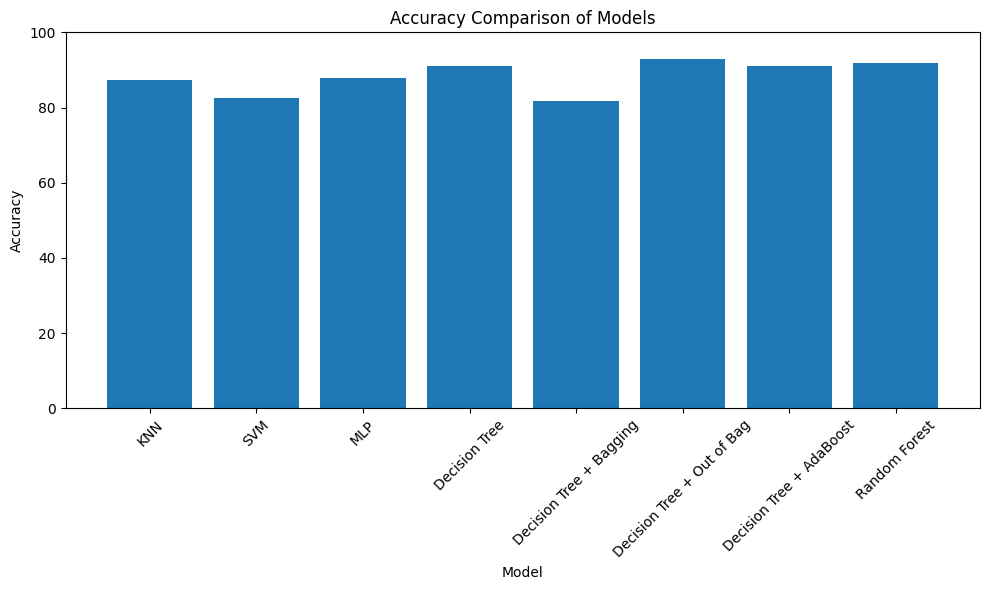

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import export_graphviz
import pydot

# Khởi tạo các mô hình
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
svm = SVC(C=1, kernel='linear', probability=True)
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
decision_tree = DecisionTreeClassifier(max_depth=None, criterion='entropy')
bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=None), n_estimators=100,
                            max_samples=100, bootstrap=True, random_state=42)
outofbag = BaggingClassifier(DecisionTreeClassifier(max_depth=None), n_estimators=100,
                             bootstrap=True, oob_score=True, random_state=40)
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=None), n_estimators=100,
                              algorithm="SAMME.R", learning_rate=0.5, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, max_depth=None)


# Các giá trị và mô hình cần đánh giá
models = {
    'KNN': knn,
    'SVM': svm,
    'MLP': mlp,
    'Decision Tree': decision_tree,
    'Decision Tree + Bagging': bagging,
    'Decision Tree + Out of Bag': outofbag,
    'Decision Tree + AdaBoost': adaboost,
    'Random Forest': random_forest    
}

n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Scaler dữ liệu
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_df_processed)

# Chuyển đổi dữ liệu thành dạng numpy
X = X_scaler
y = y_df_processed.to_numpy().ravel()

# Lưu kết quả đánh giá
evaluation_values = {
    'Model': [],
    'Accuracy': []
}

# Chạy các mô hình và tính accuracy
for model_name, model in models.items():
    accuracy_scores = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)*100
        accuracy_scores.append(accuracy)
    
    mean_accuracy = np.mean(accuracy_scores)
    evaluation_values['Model'].append(model_name)
    evaluation_values['Accuracy'].append(mean_accuracy)

# In cây
export_graphviz(
    decision_tree,
    out_file='decision_tree_dct.dot',
    feature_names=X_df_processed.columns,
    class_names=np.unique(y).astype(str),
    rounded=True,
    filled=True
)

# Lưu thành file png
(graph,) = pydot.graph_from_dot_file('decision_tree_dct.dot')
graph.write_png('decision_tree_dct.png')

# Tạo DataFrame từ kết quả đánh giá
df = pd.DataFrame(evaluation_values)

# In kết quả
print(df)

# Lưu DataFrame thành file CSV
df.to_csv('D:\KLTN\Final\Accuracy.csv', index=False)

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Accuracy'])
plt.title('Accuracy Comparison of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Đặt giới hạn trục y từ 0 đến 1
plt.xticks(rotation=45)  # Xoay nhãn trục x để tránh chồng chéo
plt.tight_layout()  # Tự động điều chỉnh khoảng cách giữa các phần tử trong đồ thị
# Lưu hình ảnh
plt.savefig(r'D:\KLTN\Final\accuracy_graph.png')

plt.show()

Precision

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import precision_score

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Khởi tạo các mô hình
knn = KNeighborsClassifier(n_neighbors=9,metric='minkowski')
svm = SVC(C=1, kernel='linear', probability=True)
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
decision_tree = DecisionTreeClassifier(max_depth=None, criterion="gini")
bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=None),n_estimators=100,
                max_samples=100, bootstrap=True, random_state=42)
outofbag = BaggingClassifier(DecisionTreeClassifier(max_depth=None), n_estimators=100,
                bootstrap=True, oob_score=True, random_state=40)
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=None), n_estimators=100,
                algorithm="SAMME.R", learning_rate=0.5, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, max_depth=None)

# Các giá trị và mô hình cần đánh giá
models = {
    'KNN': knn,
    'SVM': svm,
    'MLP': mlp,
    'Decision Tree': decision_tree,
    'Decision Tree + Bagging': bagging,
    'Decision Tree + Out of Bag': outofbag,
    'Decision Tree + AdaBoost': adaboost,
    'Random Forest': random_forest
}

n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Chuyển đổi dữ liệu thành dạng numpy
X = X_df_processed.to_numpy()
y = y_df_processed.to_numpy().ravel()

# Lưu kết quả đánh giá
evaluation_values = {
    'Model': [],
    'Precision': []
}

# Chạy các mô hình và tính accuracy
for model_name, model in models.items():
    precision_scores = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        precision = precision_score(y_test, y_pred, average='weighted')*100 # tính toán precision trên toàn bộ dữ liệu
        precision_scores.append(precision)
    
    mean_precision = np.mean(precision_scores)
    evaluation_values['Model'].append(model_name)
    evaluation_values['Precision'].append(mean_precision)

# Tạo DataFrame từ kết quả đánh giá
df = pd.DataFrame(evaluation_values)

# In kết quả
print(df)

# Lưu DataFrame thành file CSV
df.to_csv('D:\KLTN\Final\Precision.csv', index=False)

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Precision'])
plt.title('Precision Comparison of Models')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.ylim(0, 100)  # Đặt giới hạn trục y từ 0 đến 1
plt.xticks(rotation=45)  # Xoay nhãn trục x để tránh chồng chéo
plt.tight_layout()  # Tự động điều chỉnh khoảng cách giữa các phần tử trong đồ thị
# Lưu hình ảnh
plt.savefig(r'D:\KLTN\Final\precision_graph.png')

plt.show()



Recall

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import recall_score

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Khởi tạo các mô hình
knn = KNeighborsClassifier(n_neighbors=9,metric='minkowski')
svm = SVC(C=1, kernel='linear', probability=True)
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
decision_tree = DecisionTreeClassifier(max_depth=None, criterion="gini")
bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=None),n_estimators=100,
                max_samples=100, bootstrap=True, random_state=42)
outofbag = BaggingClassifier(DecisionTreeClassifier(max_depth=None), n_estimators=100,
                bootstrap=True, oob_score=True, random_state=40)
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=None), n_estimators=100,
                algorithm="SAMME.R", learning_rate=0.5, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, max_depth=None)

# Các giá trị và mô hình cần đánh giá
models = {
    'KNN': knn,
    'SVM': svm,
    'MLP': mlp,
    'Decision Tree': decision_tree,
    'Decision Tree + Bagging': bagging,
    'Decision Tree + Out of Bag': outofbag,
    'Decision Tree + AdaBoost': adaboost,
    'Random Forest': random_forest
}

n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Chuyển đổi dữ liệu thành dạng numpy
X = X_df_processed.to_numpy()
y = y_df_processed.to_numpy().ravel()

# Lưu kết quả đánh giá
evaluation_values = {
    'Model': [],
    'Recall': []
}

# Chạy các mô hình và tính accuracy
for model_name, model in models.items():
    recall_scores = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        recall = recall_score(y_test, y_pred, average='weighted')*100
        recall_scores.append(recall)
    
    mean_recall = np.mean(recall_scores)
    evaluation_values['Model'].append(model_name)
    evaluation_values['Recall'].append(mean_recall)

# Tạo DataFrame từ kết quả đánh giá
df = pd.DataFrame(evaluation_values)

# In kết quả
print(df)

# Lưu DataFrame thành file CSV
df.to_csv('D:\KLTN\Final\Recall.csv', index=False)

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Recall'])
plt.title('Recall Comparison of Models')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.ylim(0, 100)  # Đặt giới hạn trục y từ 0 đến 1
plt.xticks(rotation=45)  # Xoay nhãn trục x để tránh chồng chéo
plt.tight_layout()  # Tự động điều chỉnh khoảng cách giữa các phần tử trong đồ thị
# Lưu hình ảnh
plt.savefig(r'D:\KLTN\Final\recall_graph.png')

plt.show()



f1_score

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Khởi tạo các mô hình
knn = KNeighborsClassifier(n_neighbors=9,metric='minkowski')
svm = SVC(C=1, kernel='linear', probability=True)
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
decision_tree = DecisionTreeClassifier(max_depth=None,criterion="gini")
bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=None),n_estimators=100,
                max_samples=100, bootstrap=True, random_state=42)
outofbag = BaggingClassifier(DecisionTreeClassifier(max_depth=None), n_estimators=100,
                bootstrap=True, oob_score=True, random_state=40)
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=None), n_estimators=100,
                algorithm="SAMME.R", learning_rate=0.5, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, max_depth=None)

# Các giá trị và mô hình cần đánh giá
models = {
    'KNN': knn,
    'SVM': svm,
    'MLP': mlp,
    'Decision Tree': decision_tree,
    'Decision Tree + Bagging': bagging,
    'Decision Tree + Out of Bag': outofbag,
    'Decision Tree + AdaBoost': adaboost,
    'Random Forest': random_forest
}

n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Chuyển đổi dữ liệu thành dạng numpy
X = X_df_processed.to_numpy()
y = y_df_processed.to_numpy().ravel()

# Lưu kết quả đánh giá
evaluation_values = {
    'Model': [],
    'F1 Score': []
}

# Chạy các mô hình và tính accuracy
for model_name, model in models.items():
    f1_scores = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='weighted')*100
        f1_scores.append(f1)
    
    mean_f1_score = np.mean(f1_scores)
    evaluation_values['Model'].append(model_name)
    evaluation_values['F1 Score'].append(mean_f1_score)

# Tạo DataFrame từ kết quả đánh giá
df = pd.DataFrame(evaluation_values)

# In kết quả
print(df)

# Lưu DataFrame thành file CSV
df.to_csv('D:\KLTN\Final\F1_Score.csv', index=False)

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['F1 Score'])
plt.title('F1 Score Comparison of Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 100)  # Đặt giới hạn trục y từ 0 đến 1
plt.xticks(rotation=45)  # Xoay nhãn trục x để tránh chồng chéo
plt.tight_layout()  # Tự động điều chỉnh khoảng cách giữa các phần tử trong đồ thị

# Lưu hình ảnh
plt.savefig(r'D:\KLTN\Final\f1_scores_graph.png')

plt.show()